In [3]:
import pandas as pd
import numpy as np


In [5]:
## load the dataset
from sklearn.datasets import  load_breast_cancer

In [6]:
data=load_breast_cancer()

In [ ]:
data

In [8]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
data.target ## target value
data.target_names ## Target column name

array(['malignant', 'benign'], dtype='<U9')

In [95]:
## create the dataframe
df=pd.DataFrame(np.c_[data.data,data.target],columns=[list(data.feature_names)+['target']])
df_copy=df.copy()

In [104]:
df.tail(3)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


In [ ]:
print("The null value in the complete dataframe \n",df.isna().sum())


print("The shape of the data is ",df.shape)

In [35]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]


In [98]:
import seaborn as sns

# pair plot of sample feature
##sns.pairplot(df_copy,hue ='target',vars =['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'] )
## plt.show()

In [32]:
## Split data
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
print("Shape of X_train = ",X_train.shape)
print("Shape of X_test = ",X_test.shape)
print("Shape of y_train = ",y_train.shape)
print("Shape of y_test = ",y_test.shape)

Shape of X_train =  (455, 30)
Shape of X_test =  (114, 30)
Shape of y_train =  (455,)
Shape of y_test =  (114,)


In [39]:
from sklearn.svm import SVC

In [41]:
classification_rbf=SVC(kernel='rbf')
classification_rbf.fit(X_train,y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [42]:
classification_rbf.score(X_test,y_test)


0.9473684210526315

In [45]:
## Feature Scaling to make the data to the same scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [46]:
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [48]:
X_train_sc=sc.fit_transform(X_train)

X_test_sc=sc.fit_transform(X_test)

In [49]:
classification_rbf_2=SVC(kernel='rbf')
classification_rbf_2.fit(X_train_sc,y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [50]:
classification_rbf_2.score(X_test_sc,y_test)

0.9824561403508771

In [51]:
## implementing the kernel poly

classification_poly_2=SVC(kernel='poly',degree=2)
classification_poly_2.fit(X_train_sc,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [52]:
classification_poly_2.score(X_test_sc,y_test)

0.7631578947368421

In [54]:
classification_linear_2=SVC(kernel='poly')
classification_linear_2.fit(X_train_sc,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [55]:
classification_linear_2.score(X_test_sc,y_test)

0.868421052631579

In [57]:
## Predict the value for a random input
patient1=[17.99,	
         10.38,
         122.8,
         1001.0,
         0.11840,
         0.27760,
         0.3001,
         0.14710,
         0.2419,
         0.07871,
         1.0950,
         0.9053,
         8.589,
         153.40,
         0.006399,
         0.04904,
         0.05373,
         0.01587,
         0.03003,
         0.006193,
         25.38,
         17.33,
         184.6,
         2019.0,
         0.1622,
         0.6656,
         0.7119,
         0.2654,
         0.4601,
         0.11890	]

In [59]:
## feature scaling the data

patient1_sc=sc.transform(np.array([patient1]))
patient1_sc  ## scaled data 

array([[ 1.09999615, -2.11349025,  1.2594904 ,  1.01323385,  1.36433119,
         3.15174848,  2.62277826,  2.30258757,  2.23030504,  2.44986159,
         2.68433008, -0.6281174 ,  3.14171557,  2.96856051, -0.30699286,
         1.63599618,  1.26550991,  0.79245237,  1.11368866,  1.26008917,
         1.82509327, -1.38637269,  2.22419433,  1.95220659,  1.23302248,
         2.43947474,  2.18929189,  2.21549771,  3.0429743 ,  1.8345259 ]])

In [61]:
pred=classification_rbf_2.predict(patient1_sc)
pred ## predicated the patent have cancer

array([0.])

In [63]:
if pred[0]==0:
  print("The patient have the malignant cancer")
else:
  print("The Patient have no malignant cancer (benign")


The patient have the malignant cancer


In [70]:
y_pred=classification_rbf_2.predict(X_test_sc)

In [64]:
(from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

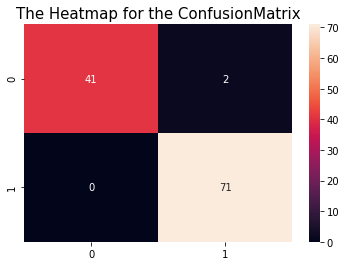

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.title('The Heatmap for the ConfusionMatrix',fontsize=15)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.show()



In [83]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98        43
         1.0       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [84]:
## Cross validation of the model
from sklearn.model_selection import cross_val_score

In [88]:
cross_validation=cross_val_score(estimator=classification_rbf_2,X=X_train_sc,y=y_train,cv=5)
cross_validation
cross_validation.mean()

0.9758241758241759

In [101]:
## Pickle
import pickle
 
# save model
pickle.dump(classification_rbf_2, open('breast_cancer_detector.pickle', 'wb'))
 
# load model
breast_cancer_detector_model = pickle.load(open('breast_cancer_detector.pickle', 'rb'))
 
# predict the output
y_pred = breast_cancer_detector_model.predict(X_test_sc)
 
# confusion matrix
print('Confusion matrix of SVC model: \n',confusion_matrix(y_test, y_pred),'\n')
 
# show the accuracy
print('Accuracy of SVC model = ',accuracy_score(y_test, y_pred))

Confusion matrix of SVC model: 
 [[41  2]
 [ 0 71]] 

Accuracy of SVC model =  0.9824561403508771


In [103]:
y_pred = breast_cancer_detector_model.predict(patient1_sc)
y_pred

array([0.])

In [118]:
patient2=[7.76,
              24.54,
              47.92,
              181.0,
              0.05263,
              0.0436,
              0.00000,
              0.00000,
              0.1587,
              0.05884,
              0.3857,
              1.428,
              2.548,
              19.15,
              0.007189,
              0.00466,
              0.00000,
              0.00000,
              0.02676,
              0.002783,
              9.456,
              30.37,
              59.16,
              268.6,
              0.08996,
              0.06444,
              0.0000,
              0.0000,
              0.2871,
              0.07039 ]

In [123]:
patient2_sc=sc.transform(np.array([patient2])) ## scaling the imput data
pred_2=breast_cancer_detector_model.predict(patient2_sc)
pred_2

array([1.])

In [125]:
if pred_2[0]==0:
  print("The patient have the malignant cancer")
else:
  print("The Patient have no malignant cancer (benign)")

The Patient have no malignant cancer (benign)
